In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# calculate the compliance per length of silicone and plastic tubes   

#Silicone

#Material properties. Found on https://www.azom.com/properties.aspx?ArticleID=920
E_s = np.linspace(0.001,0.05,100)*1E9 #young's modulus
E_s = E_s[0]
r_s = 0.5E-3 #radius
t_s = 2E-3 #thickness

#compliance per length
compliance_per_length_silicone = (2* np.pi * r_s**3) / (E_s*t_s)
print("The compliance per length of silicone is: ",compliance_per_length_silicone)

#Plastic

#Material properties. Found on https://en.wikipedia.org/wiki/Perfluoroalkoxy_alkane
E_p = 586E9 #young's modulus
r_p = 0.76/2 * 1E-3 #radius
t_p = (1.59 - 0.76) * 1E-3 #thickness

#compliance per length
compliance_per_length_plastic = (2* np.pi * r_p**3) / (E_p*t_p)
print("The compliance per length of plastic is: ",compliance_per_length_plastic)




The compliance per length of silicone is:  3.9269908169872413e-13
The compliance per length of plastic is:  7.0885098929963875e-19


In [79]:
#calculate the compliance of silicon

#Length of the silicon tubes
L = 0.2

C = compliance_per_length_silicone * L
print("The compliance of silicon tube of", L, "m is: ",C)

The compliance of silicon tube of 0.2 m is:  7.853981633974483e-14


In [80]:
#calculate the resistance

#Resistance of the silicon tubes
R_silicone = 1E-3 * (8 / np.pi) * (L/r_s**4)

R_capillary = 1E-3 * 28.4 * (50E-3/(400**4*1E-24)) #Resistance of the capillary tubes 50 mm in length with side length 400 um

# Format the number in scientific notation

print("{:.2e}".format(R_capillary))
print("{:.2e}".format(R_silicone))

5.55e+10
8.15e+09


In [81]:
#Calculate the taus
tau1 = R_silicone * C
tau2 = R_capillary * C

print("The tau of the silicone tube is: ", tau1)
print("The tau of the capillary tube is: ", tau2)

The tau of the silicone tube is:  0.0006399999999999999
The tau of the capillary tube is:  0.004356505437595221


In [82]:
#defining the pressure function
def Compliance_pressure(t):
    return p_star + delta_p*(tau2/(tau1 + tau2))*np.exp(-(1 / tau1 + 1 / tau2)*t)

In [91]:
#defining the parameters
t = np.linspace(0,0.01,10000)
delta_p = 10
p_star = 0

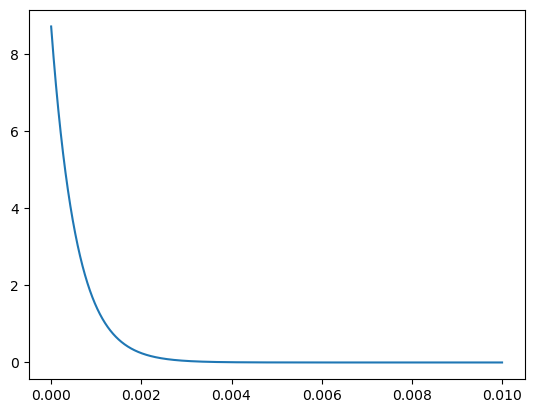

In [92]:
#create subplot
fig, ax = plt.subplots()
ax.plot(t,Compliance_pressure(t))